#**Import libraries**

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import chain, combinations

#**Load Wine Quality data**

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/186/data.csv')
print("Dataset Head:")
print(df.head())

Dataset Head:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8      

##Scale data

In [3]:
# Select only numeric columns for scaling
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

##Visualize data

<Figure size 1000x1000 with 0 Axes>

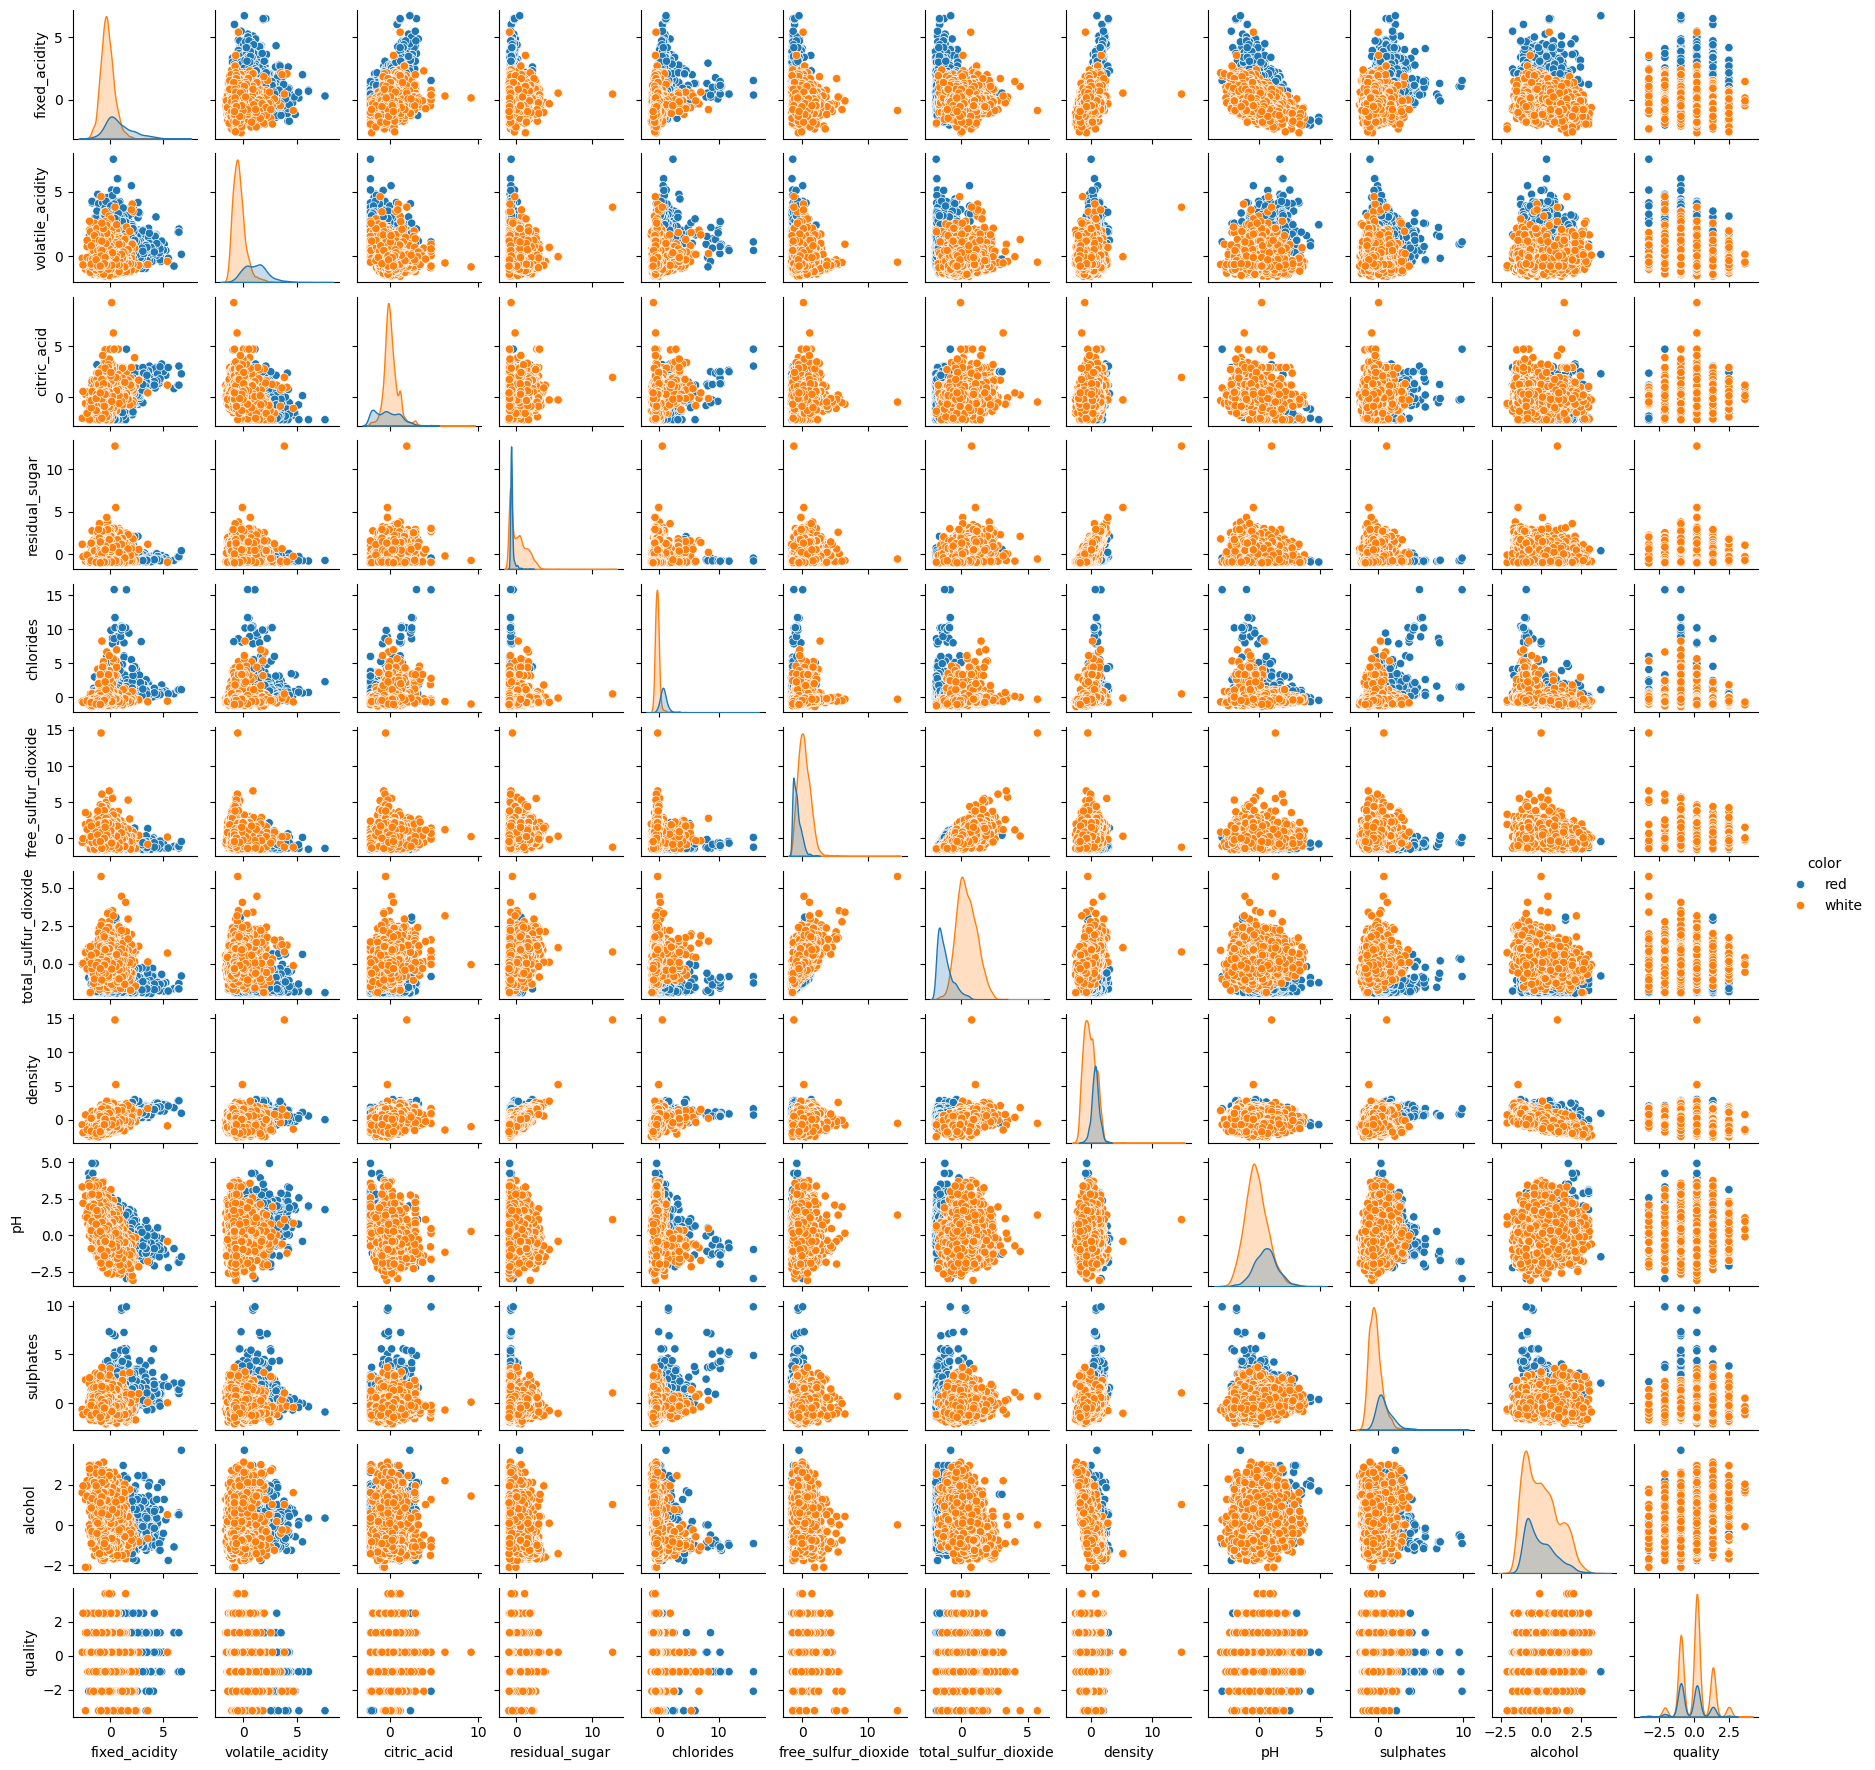

In [4]:
# Plot correlogram
plt.figure(figsize=(10,10))
sns.pairplot(df, height=1.5, hue='color')
plt.show()

#**Classification**

## Split data

In [5]:
df['wine_code'] = [1 if x == 'red' else 0 for x in df['color']]

#Extract features and labels
x, y = df.iloc[:,:-4].to_numpy(), df.iloc[:,-1].to_numpy()

#Extract features and labels
x, y = df.iloc[:,:-4].to_numpy(), df.iloc[:,-1].to_numpy()

#Create training, validation, and test set
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0, stratify=y_2)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4547, 10)
(975, 10)
(975, 10)


##Grid search on better models

In [6]:
#Power set generator
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# Search over different specification values
max_acc = 0
best_mdl = 0
spec = 0
poly = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  for pow in np.array([1,2,3]):
      X_train_md = X_train[:, var]
      y_train_md = y_train
      X_val_md = X_val[:, var]
      y_val_md = y_val
      mdl = make_pipeline(PolynomialFeatures(degree=pow),SVC(kernel='linear')).fit(X_train_md,y_train_md)
      train_acc = mdl.score(X_train_md,y_train_md)
      val_acc = mdl.score(X_val_md,y_val_md)
      print(f"Specification: {var}")
      print(f"Polynomial degree: {pow}")
      print(f"\tTraining accuracy: {train_acc}")
      print(f"\tValidation accuracy: {val_acc}")
      if val_acc > max_acc:
          max_acc = val_acc
          best_mdl = mdl
          spec = var
          poly = pow

Streaming output truncated to the last 5000 lines.
Specification: (2, 4, 5, 8, 9)
Polynomial degree: 2
	Training accuracy: 0.9731691224983505
	Validation accuracy: 0.9661538461538461
Specification: (2, 4, 5, 8, 9)
Polynomial degree: 3
	Training accuracy: 0.9819661315152848
	Validation accuracy: 0.9682051282051282
Specification: (2, 4, 6, 7, 8)
Polynomial degree: 1
	Training accuracy: 0.974048823400044
	Validation accuracy: 0.9702564102564103
Specification: (2, 4, 6, 7, 8)
Polynomial degree: 2
	Training accuracy: 0.9872443369254453
	Validation accuracy: 0.9774358974358974
Specification: (2, 4, 6, 7, 8)
Polynomial degree: 3
	Training accuracy: 0.9942819441389927
	Validation accuracy: 0.9815384615384616
Specification: (2, 4, 6, 7, 9)
Polynomial degree: 1
	Training accuracy: 0.9788871783593578
	Validation accuracy: 0.9753846153846154
Specification: (2, 4, 6, 7, 9)
Polynomial degree: 2
	Training accuracy: 0.9887838135034088
	Validation accuracy: 0.9805128205128205
Specification: (2, 4, 6, 7

## Present best model

Specification: (1, 3, 5, 6, 7, 9)
Polynomial degree: 2
Training accuracy of Best Model: 0.9942819441389927
Validation accuracy of Best Model: 0.9969230769230769
Testing accuracy of Best Model: 0.9928205128205129


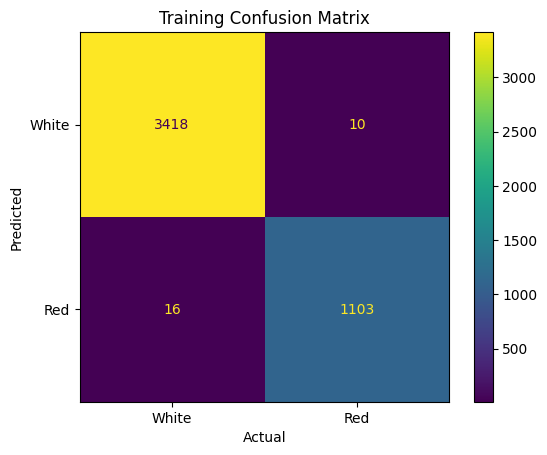

              precision    recall  f1-score   support

       white       1.00      1.00      1.00      3428
         red       0.99      0.99      0.99      1119

    accuracy                           0.99      4547
   macro avg       0.99      0.99      0.99      4547
weighted avg       0.99      0.99      0.99      4547



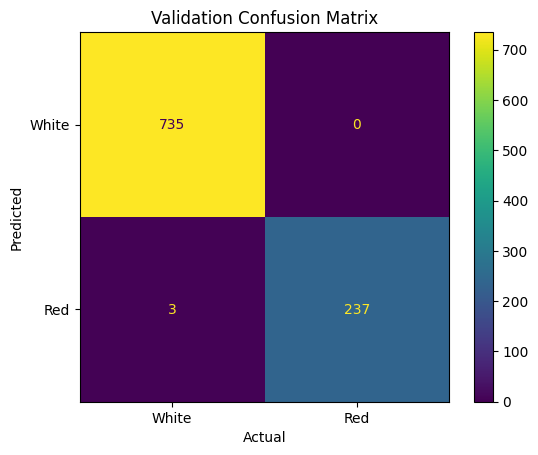

              precision    recall  f1-score   support

       white       1.00      1.00      1.00       735
         red       1.00      0.99      0.99       240

    accuracy                           1.00       975
   macro avg       1.00      0.99      1.00       975
weighted avg       1.00      1.00      1.00       975



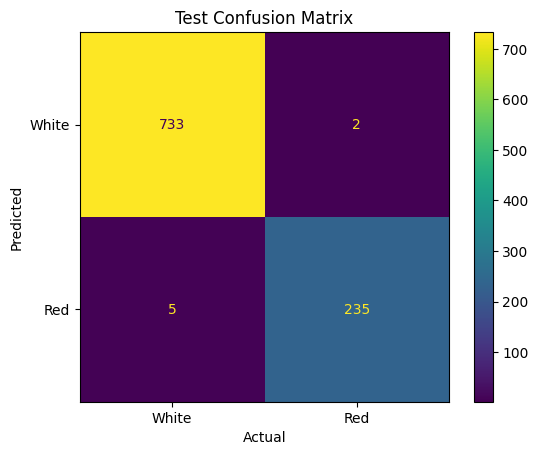

              precision    recall  f1-score   support

       white       0.99      1.00      1.00       735
         red       0.99      0.98      0.99       240

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975



In [7]:
# Print results of the best model
print(f"Specification: {spec}")
print(f"Polynomial degree: {poly}")


# Plot the Actual vs. Predicted values
X_test_md = X_test[:,spec]
y_test_md = y_test
X_train_md = X_train[:,spec]
y_train_md = y_train
X_val_md = X_val[:,spec]
y_val_md = y_val

train_acc = best_mdl.score(X_train_md,y_train_md)
print(f"Training accuracy of Best Model: {train_acc}")
val_acc = best_mdl.score(X_val_md,y_val_md)
print(f"Validation accuracy of Best Model: {val_acc}")
test_acc = best_mdl.score(X_test_md,y_test_md)
print(f"Testing accuracy of Best Model: {test_acc}")

y_train_pred = best_mdl.predict(X_train_md)
y_val_pred = best_mdl.predict(X_val_md)
y_test_pred = best_mdl.predict(X_test_md)

cfm = confusion_matrix(y_train, y_train_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["White", "Red"])
cm_display.plot()
plt.title('Training Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
print(classification_report(y_train, y_train_pred, target_names=['white', 'red']))

cfm = confusion_matrix(y_val, y_val_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["White", "Red"])
cm_display.plot()
plt.title('Validation Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
print(classification_report(y_val, y_val_pred, target_names=['white', 'red']))

cfm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["White", "Red"])
cm_display.plot()
plt.title('Test Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
print(classification_report(y_test, y_test_pred, target_names=['white', 'red']))